<a href="https://colab.research.google.com/github/ycarrera01/Miner-a-de-datos/blob/main/An%C3%A1lisisIPHEestadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se cargan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Cargar dataset
df = pd.read_excel("agrupado.xlsx")

In [3]:
#Comprobar que la data está cargada correctamente
df.head ()

,Fecha_Cierre,Año,Mes,Número_mes,"Escuela, Programa, Extensión",C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
0,2021-01-31,2021,Enero,1,Escuela de Enseñanza Especial,1476,876,600,0,0,0,0,0,0
1,2021-01-31,2021,Enero,1,Escuela Vocacional Especial,593,374,219,0,853,543,310,0,0
2,2021-01-31,2021,Enero,1,Escuela de Sordos,1006,624,382,0,24,11,13,0,0
3,2021-01-31,2021,Enero,1,Escuela de Ciegos Hellen Keller,145,94,51,0,105,51,54,0,0
4,2021-01-31,2021,Enero,1,Programa de Autismo,281,199,82,0,76,65,11,0,0


In [4]:
# Busco conocer el tipo de datos que tiene el dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Año                           525 non-null    int64         
 2   Mes                           525 non-null    object        
 3   Número_mes                    525 non-null    int64         
 4   Escuela, Programa, Extensión  525 non-null    object        
 5    C_E_Total                    525 non-null    int64         
 6   C_E_Hombre                    525 non-null    int64         
 7   C_E_Mujer                     525 non-null    int64         
 8   C_E_Contactado                525 non-null    int64         
 9   IPHE_Total                    525 non-null    int64         
 10  IPHE_Hombre                   525 non-null    int64         
 11  IPHE_Mujer                    52

In [5]:
#Aplicar la estadistica descriptiva para entender el comportamiento de los datos
df.describe ()

,Fecha_Cierre,Año,Número_mes,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
count,525,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,2022-02-01 00:57:36,2021.560000,6.360000,536.579048,133.180952,77.767619,149.337143,226.828571,62.529524,36.598095,56.967619,10.815238
min,2021-01-31 00:00:00,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-31 00:00:00,2021.000000,3.000000,250.000000,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-01-31 00:00:00,2022.000000,6.000000,373.000000,0.000000,0.000000,0.000000,162.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-07-31 00:00:00,2022.000000,9.000000,837.000000,199.000000,101.000000,153.000000,284.000000,95.000000,56.000000,25.000000,0.000000
max,2023-03-31 00:00:00,2023.000000,12.000000,1528.000000,955.000000,641.000000,1431.000000,1382.000000,839.000000,543.000000,862.000000,224.000000
std,NaN,0.571859,3.454436,392.375507,223.659245,137.825033,316.069230,227.608017,126.136927,74.783073,139.498656,26.269343


In [6]:
print(df.columns.tolist())

['Fecha_Cierre', 'Año', 'Mes', 'Número_mes', 'Escuela, Programa, Extensión', ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes']


In [7]:
# Lista de columnas a evaluar se seleccionan las numéricas int64
columnas_numericas = [
    ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

# Agrupar por mes.
# y verificar si todas las columnas numéricas son cero en cada grupo
meses_validos = df.groupby("Fecha_Cierre")[columnas_numericas].sum().ne(0).any(axis=1)


In [8]:
# se crea una copia de dataframe para que se guarden los cambios
df_limpio = df.copy()

# Los datos publicados presentan incosistencias mes a mes, y es que no todos los
# meses se publicaban todos los datos de las variables de estudio.
# Con la ayuda de este código se busca que si la columna está totalmente en cero para
# ese mes se reemplace a NaN para que los resultados no se afecten
for mes, grupo in df.groupby("Fecha_Cierre"):
    for col in columnas_numericas:
        if grupo[col].sum() == 0:

            df_limpio.loc[df["Fecha_Cierre"] == mes, col] = np.nan

In [9]:
# Confirmando los resultados
df_limpio[df_limpio["Fecha_Cierre"] == "11/30/2022"][columnas_numericas]

,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
462,1396,864.0,532.0,NaN,0,0.0,0.0,NaN,NaN
463,592,412.0,180.0,NaN,897,563.0,334.0,NaN,NaN
464,1022,614.0,408.0,NaN,32,19.0,13.0,NaN,NaN
465,166,99.0,67.0,NaN,104,62.0,42.0,NaN,NaN
466,329,228.0,101.0,NaN,130,108.0,22.0,NaN,NaN
467,405,256.0,149.0,NaN,183,126.0,57.0,NaN,NaN
468,367,244.0,123.0,NaN,178,106.0,72.0,NaN,NaN
469,390,241.0,149.0,NaN,0,0.0,0.0,NaN,NaN
470,229,141.0,88.0,NaN,198,123.0,75.0,NaN,NaN
471,147,99.0,48.0,NaN,160,103.0,57.0,NaN,NaN


In [10]:
# Quisiera eliminar unas columnas innecesarias ya que de ellas se indica la Fecha_Cierre
columnas_a_eliminar = ['Año', 'Mes', 'Número_mes']

df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

In [11]:
 df_limpio.info ()  ## Evaluando al data set limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Escuela, Programa, Extensión  525 non-null    object        
 2    C_E_Total                    525 non-null    int64         
 3   C_E_Hombre                    210 non-null    float64       
 4   C_E_Mujer                     210 non-null    float64       
 5   C_E_Contactado                147 non-null    float64       
 6   IPHE_Total                    525 non-null    int64         
 7   IPHE_Hombre                   210 non-null    float64       
 8   IPHE_Mujer                    210 non-null    float64       
 9   IPHE_Contactados              147 non-null    float64       
 10  Ctd_Docentes                  105 non-null    float64       
dtypes: datetime64[ns](1), float64(7)

In [12]:
df_limpio.describe ()

,Fecha_Cierre,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
count,525,525.000000,210.000000,210.000000,147.000000,525.000000,210.000000,210.000000,147.000000,105.000000
mean,2022-02-01 00:57:36,536.579048,332.952381,194.419048,533.346939,226.828571,156.323810,91.495238,203.455782,54.076190
min,2021-01-31 00:00:00,0.000000,0.000000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,2021-07-31 00:00:00,250.000000,146.000000,84.250000,250.000000,96.000000,62.000000,28.500000,90.000000,31.000000
50%,2022-01-31 00:00:00,373.000000,241.000000,132.000000,376.000000,162.000000,106.000000,67.000000,153.000000,40.000000
75%,2022-07-31 00:00:00,837.000000,518.000000,278.000000,841.000000,284.000000,194.000000,99.750000,270.000000,80.000000
max,2023-03-31 00:00:00,1528.000000,955.000000,641.000000,1431.000000,1382.000000,839.000000,543.000000,862.000000,224.000000
std,NaN,392.375507,242.043469,157.600475,390.296141,227.608017,158.612947,94.734090,199.585297,33.392392


,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
C_E_Total,1.000000,0.993339,0.984217,0.998807,0.108235,0.027076,0.054748,0.166477,0.713694
C_E_Hombre,0.993339,1.000000,0.957269,nan,0.065226,0.054818,0.078272,nan,nan
C_E_Mujer,0.984217,0.957269,1.000000,nan,-0.002604,-0.016235,0.017195,nan,nan
C_E_Contactado,0.998807,nan,nan,1.000000,0.141621,nan,nan,0.157774,nan
IPHE_Total,0.108235,0.065226,-0.002604,0.141621,1.000000,0.996885,0.992517,0.995725,0.483244
IPHE_Hombre,0.027076,0.054818,-0.016235,nan,0.996885,1.000000,0.981354,nan,nan
IPHE_Mujer,0.054748,0.078272,0.017195,nan,0.992517,0.981354,1.000000,nan,nan
IPHE_Contactados,0.166477,nan,nan,0.157774,0.995725,nan,nan,1.000000,nan
Ctd_Docentes,0.713694,nan,nan,nan,0.483244,nan,nan,nan,1.000000


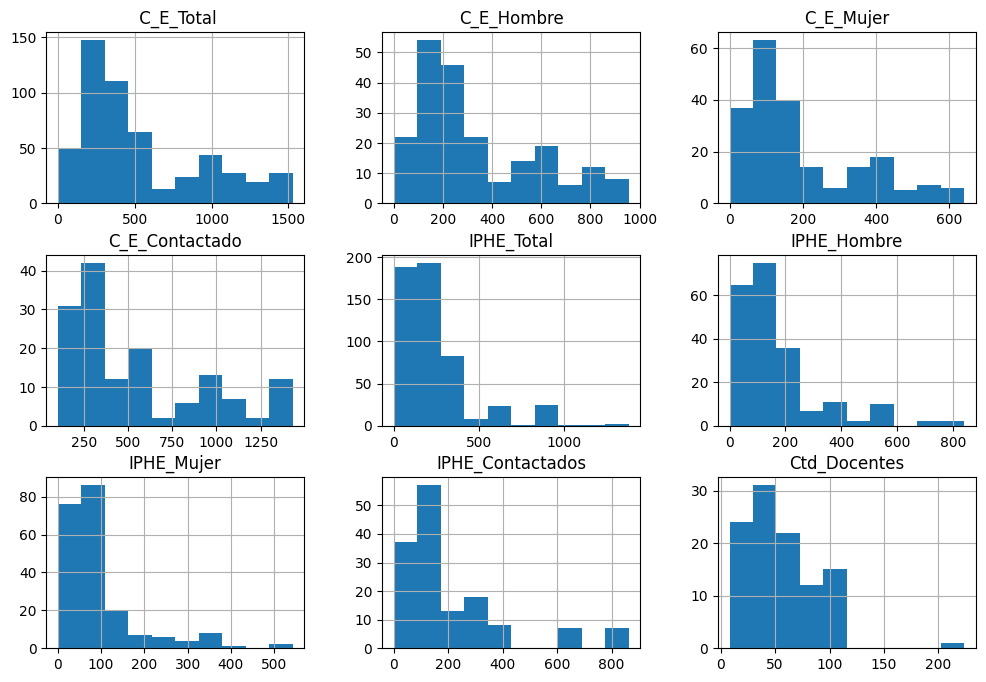

In [13]:
df_limpio[columnas_numericas].hist(figsize=(12,8))
df_limpio.corr(numeric_only=True).style.background_gradient()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Agrupar por centro y sacar promedios por columna
df_agrupado = df_limpio.groupby("Escuela, Programa, Extensión")[columnas_numericas].mean()

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agrupado)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_agrupado["cluster"] = kmeans.fit_predict(X_scaled)

df_agrupado[["cluster"]]

,cluster
"Escuela, Programa, Extensión",
Escuela Vocacional Especial,2
Escuela de Ciegos Hellen Keller,1
Escuela de Enseñanza Especial,0
Escuela de Sordos,0
Extensión de Aguadulce,1
Extensión de Antón,1
Extensión de Bocas Del Toro,1
Extensión de Chiriquí,0
Extensión de Colón,1


<ipython-input-16-d8beb49e88ff>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_agrupado.PCA1[i], df_agrupado.PCA2[i]), fontsize=8)


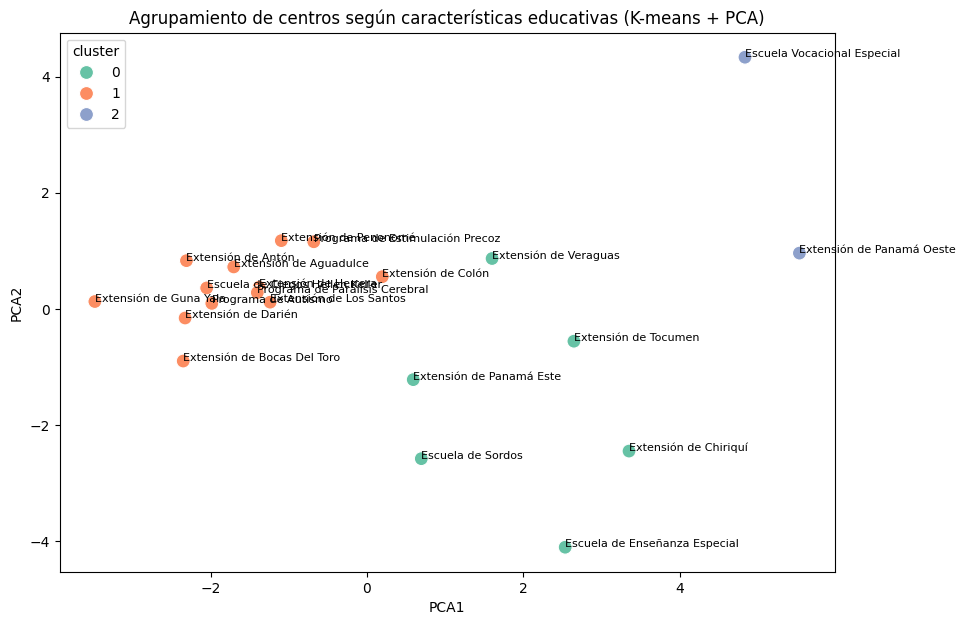

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar por nombre de centro/programa (ajusta aquí el nombre real de la columna)
nombre_col_centro = "Escuela, Programa, Extensión"  # <- Cambia esto si tu columna se llama distinto

# 2. Agrupar por centro y sacar el promedio de valores numéricos
df_agrupado = df_limpio.groupby(nombre_col_centro)[columnas_numericas].mean()

# 3. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agrupado)

# 4. Aplicar clustering (K-means con 3 clústeres como punto de partida)
kmeans = KMeans(n_clusters=3, random_state=42)
df_agrupado["cluster"] = kmeans.fit_predict(X_scaled)

# 5. Reducción de dimensiones para visualizar (PCA)
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

df_agrupado["PCA1"] = coords[:, 0]
df_agrupado["PCA2"] = coords[:, 1]

# 6. Gráfico de clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_agrupado, x="PCA1", y="PCA2", hue="cluster", palette="Set2", s=100)
for i, txt in enumerate(df_agrupado.index):
    plt.annotate(txt, (df_agrupado.PCA1[i], df_agrupado.PCA2[i]), fontsize=8)
plt.title("Agrupamiento de centros según características educativas (K-means + PCA)")
plt.show()